In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ca_df = pd.read_csv('dataset/countries-aggregated.csv')
ww_df = pd.read_csv('dataset/worldwide-aggregated.csv')

In [4]:
print(ca_df.shape)
ca_df.head()

(24816, 5)


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
print(ww_df.shape)
ww_df.head()

(132, 5)


,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [6]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24816 entries, 0 to 24815
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       24816 non-null  object
 1   Country    24816 non-null  object
 2   Confirmed  24816 non-null  int64 
 3   Recovered  24816 non-null  int64 
 4   Deaths     24816 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 969.5+ KB


In [8]:
ww_df['Date'] = pd.to_datetime(ww_df['Date'])
ww_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           132 non-null    datetime64[ns]
 1   Confirmed      132 non-null    int64         
 2   Recovered      132 non-null    int64         
 3   Deaths         132 non-null    int64         
 4   Increase rate  131 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.3 KB


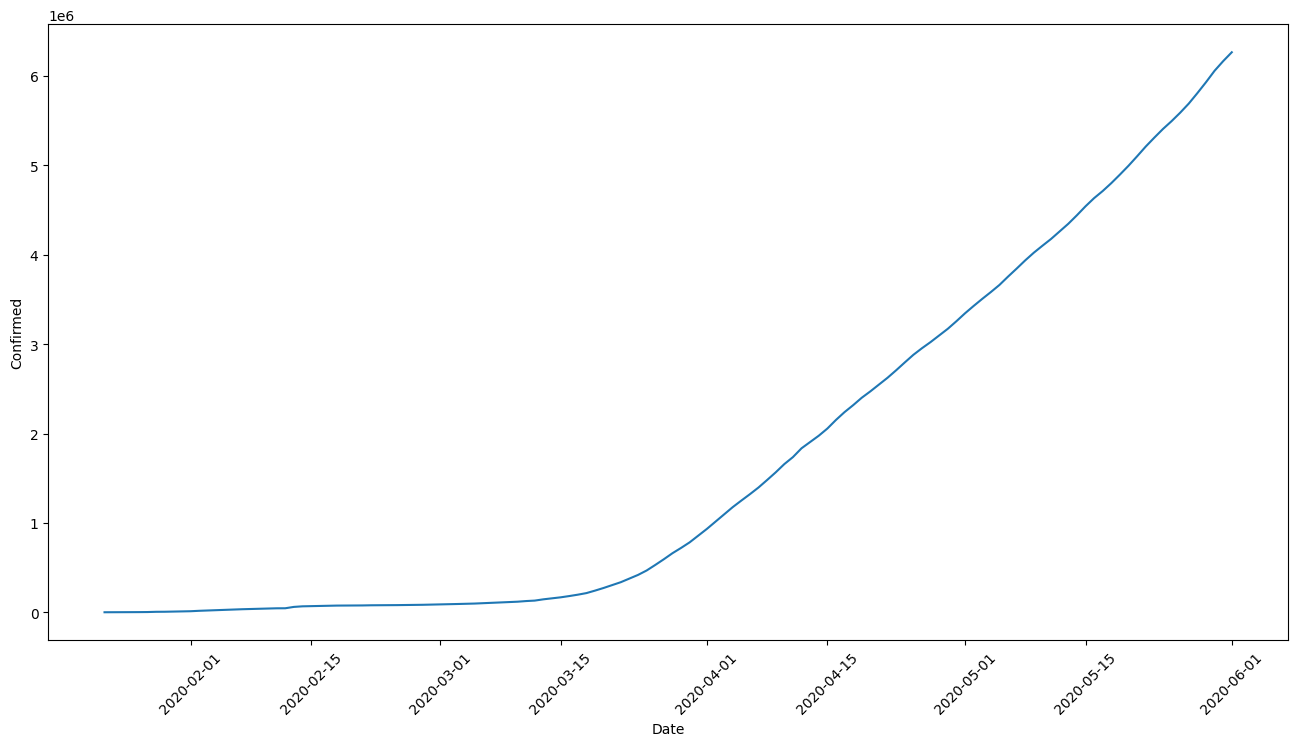

In [9]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Date', y='Confirmed', data =ww_df)
plt.xticks(rotation = 45)
plt.show()

In [10]:
ca_df['Date'] = pd.to_datetime(ca_df['Date'])

ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24816 entries, 0 to 24815
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24816 non-null  datetime64[ns]
 1   Country    24816 non-null  object        
 2   Confirmed  24816 non-null  int64         
 3   Recovered  24816 non-null  int64         
 4   Deaths     24816 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 969.5+ KB


In [11]:
group_ca_df = ca_df.groupby('Country')

group_ca_df.first()

,Date,Confirmed,Recovered,Deaths
Country,,,,
Afghanistan,2020-01-22,0,0,0
Albania,2020-01-22,0,0,0
Algeria,2020-01-22,0,0,0
Andorra,2020-01-22,0,0,0
Angola,2020-01-22,0,0,0
...,...,...,...,...
West Bank and Gaza,2020-01-22,0,0,0
Western Sahara,2020-01-22,0,0,0
Yemen,2020-01-22,0,0,0


In [12]:
group_ca_df.groups.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India'

In [21]:
group_ca_df.get_group('Albania').value_counts()

Date        Country  Confirmed  Recovered  Deaths
2020-01-22  Albania  0          0          0         1
2020-04-14  Albania  475        248        24        1
2020-04-28  Albania  750        431        30        1
2020-04-27  Albania  736        422        28        1
2020-04-26  Albania  726        410        28        1
                                                    ..
2020-02-29  Albania  0          0          0         1
2020-02-28  Albania  0          0          0         1
2020-02-27  Albania  0          0          0         1
2020-02-26  Albania  0          0          0         1
2020-06-01  Albania  1143       877        33        1
Name: count, Length: 132, dtype: int64

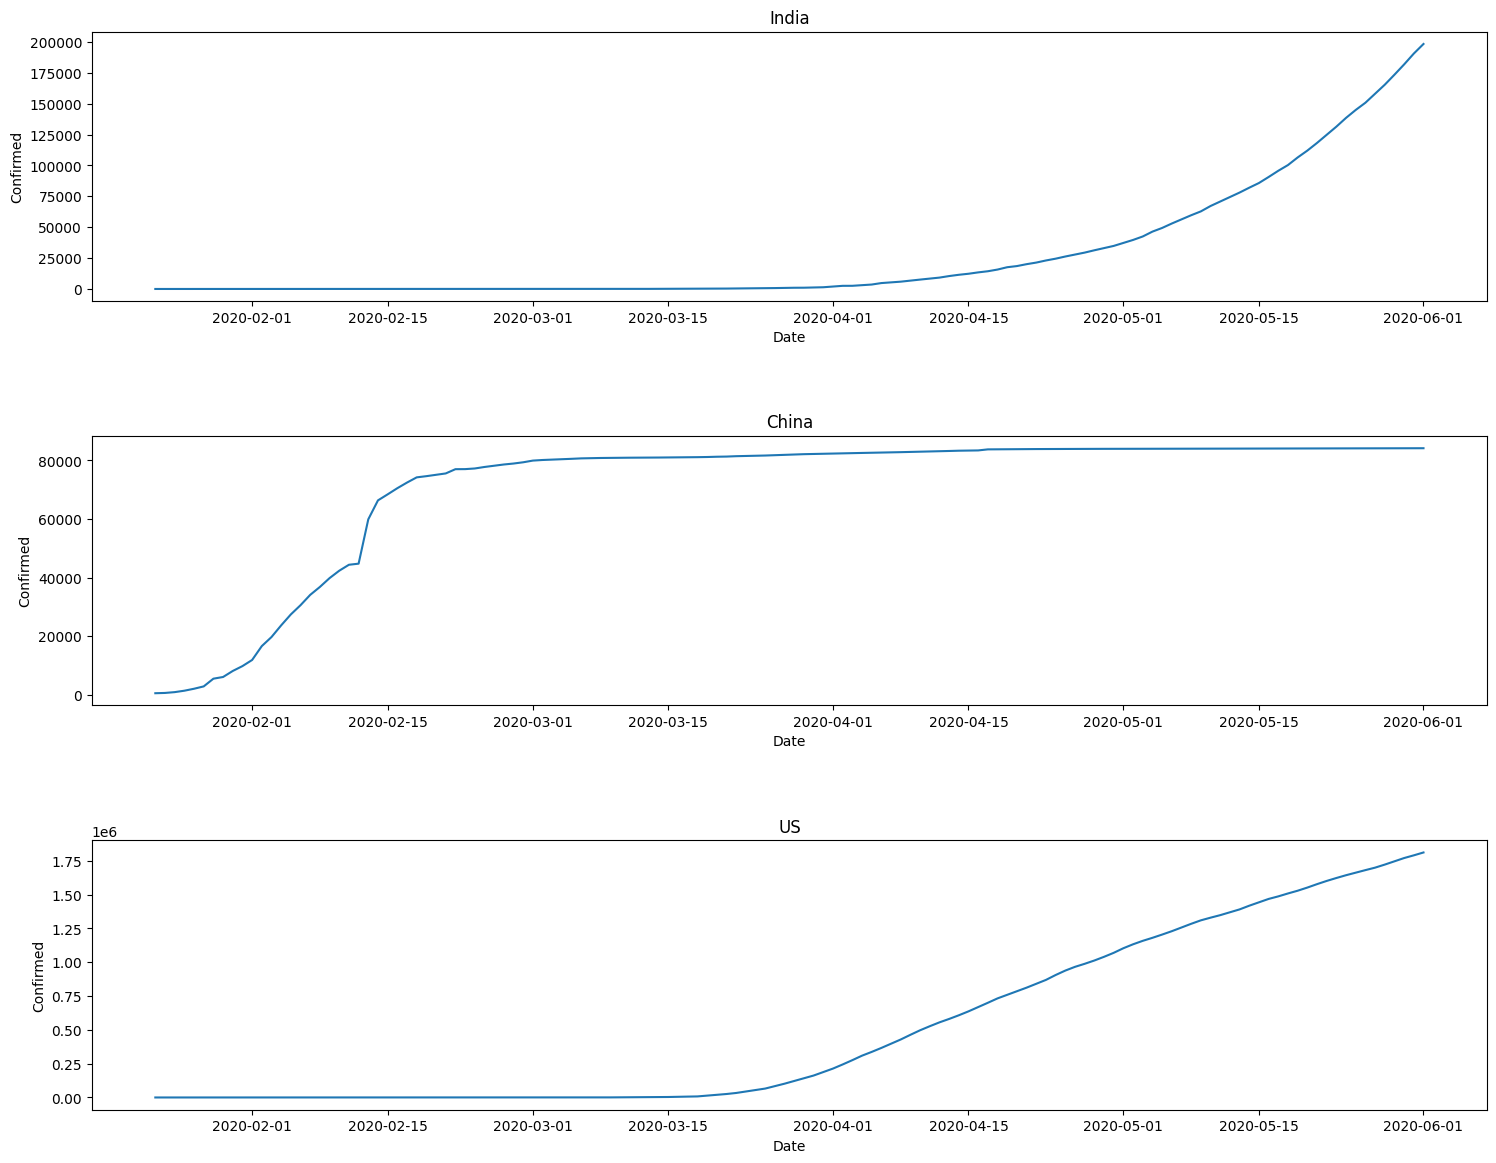

In [22]:
plt.figure(figsize=(18, 14))

plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
sns.lineplot(x = 'Date', y = 'Confirmed', data = group_ca_df.get_group('India'))
plt.title('India')

plt.subplot(312)
sns.lineplot(x = 'Date', y = 'Confirmed', data = group_ca_df.get_group('China'))
plt.title('China')

plt.subplot(313)
sns.lineplot(x = 'Date', y = 'Confirmed', data = group_ca_df.get_group('US'))
plt.title('US')

plt.show()

In [23]:
temp_df = ca_df.loc[(ca_df.Country=='China') | (ca_df.Country=='India') | (ca_df.Country=='US'), : ]

temp_df.head()

,Date,Country,Confirmed,Recovered,Deaths
36,2020-01-22,China,548,28,17
79,2020-01-22,India,0,0,0
174,2020-01-22,US,1,0,0
224,2020-01-23,China,643,30,18
267,2020-01-23,India,0,0,0


In [24]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 36 to 24802
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       396 non-null    datetime64[ns]
 1   Country    396 non-null    object        
 2   Confirmed  396 non-null    int64         
 3   Recovered  396 non-null    int64         
 4   Deaths     396 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 18.6+ KB


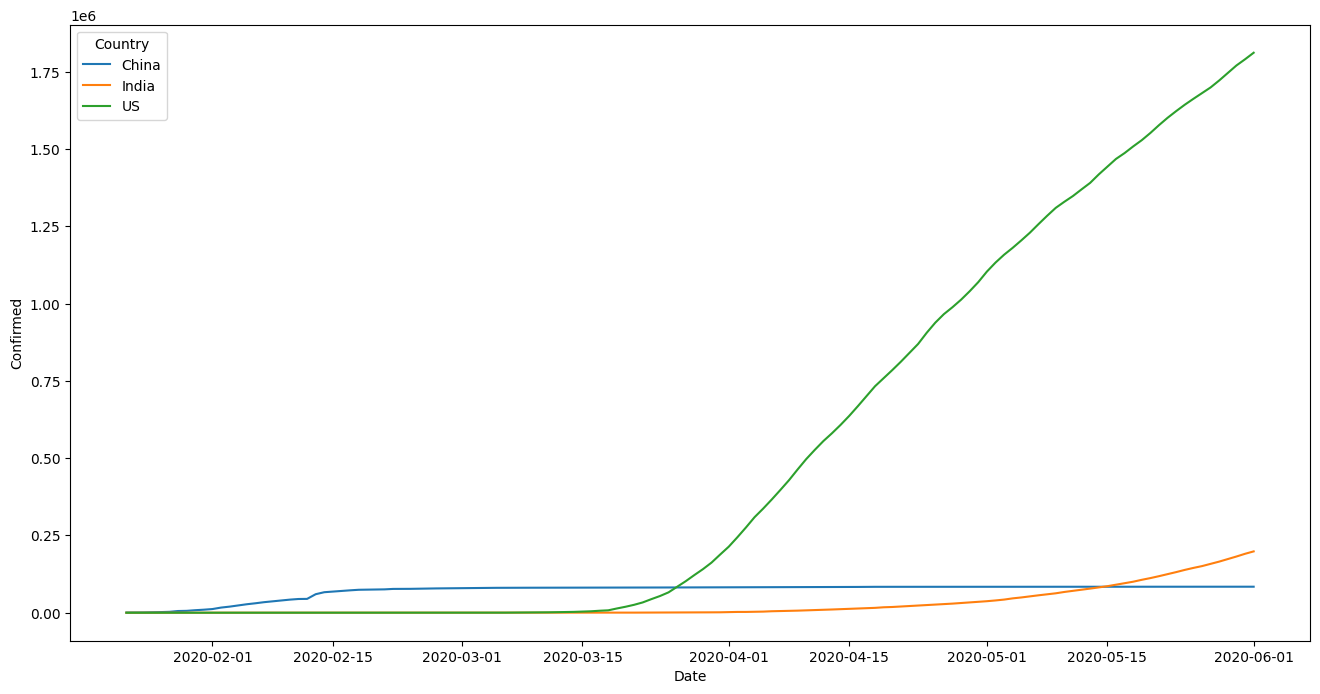

In [25]:
plt.figure(figsize=(16, 8))

sns.lineplot(x = 'Date', y = 'Confirmed', hue='Country', data = temp_df)

plt.show()